#Deep Learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

#estructura 
net = Sequential()
net.add(layers.Embedding(max_features, 128, input_length=max_len))
net.add(layers.Conv1D(32, 7, activation='relu'))
net.add(layers.MaxPooling1D(5))
net.add(layers.Conv1D(32, 7, activation='relu'))
net.add(layers.GlobalMaxPooling1D())
net.add(layers.Dense(1))
net.summary()

#compilacion
net.compile(optimizer=RMSprop(lr=1e-4),
            loss='binary_crossentropy',
            metrics=['acc'])

#entrenamiento
history = net.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.7032 - acc: 0.5210 - val_loss: 0.6855 - val_acc: 0.5540
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.6639 - acc: 0.6694 - val_loss: 0.6676 - val_acc: 0.6074
Epoch 3/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.6221 - acc: 0.7549 - val_loss: 0.6187 - val_acc: 0.7306
Epoch 4/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.5396 - acc: 0.8114 - val_loss: 0.5104 - val_acc: 0.7984
Epoch 5/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4172 - acc: 0.8468 - val_loss: 0.4399 - val_acc: 0.8202
Epoch 6/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3486 - acc: 0.8705 - val_loss: 0.3963 - val_acc: 0.8396
Epoch 7/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.3030 - acc: 0.8795 - val_loss: 0.3925 - val_acc:

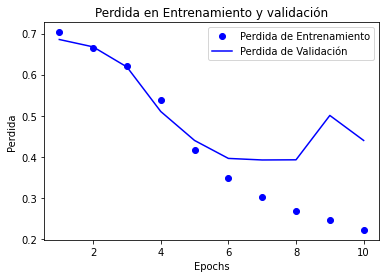

In [7]:
import matplotlib.pyplot as plt

val_loss=history.history['val_loss']
loss=history.history['loss']
epochs=range(1,len(loss)+1)
 
plt.figure()
plt.plot(epochs,loss,'bo',label='Perdida de Entrenamiento')
plt.plot(epochs,val_loss,'b',label='Perdida de Validación')
plt.legend()
plt.title('Perdida en Entrenamiento y validación')
plt.xlabel('Epochs')
plt.ylabel('Perdida')
plt.show()

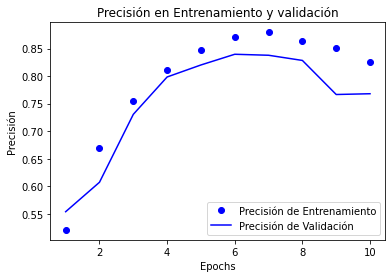

In [8]:
val_acc=history.history['val_acc']
acc=history.history['acc']
epochs=range(1,len(acc)+1)
 
plt.figure()
plt.plot(epochs,acc,'bo',label='Precisión de Entrenamiento')
plt.plot(epochs,val_acc,'b',label='Precisión de Validación')
plt.legend()
plt.title('Precisión en Entrenamiento y validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.show()